# **Linear Regression**
In this code I have used Simple Linear Regression Model to Predict the Salaries of MBA Students based on the percentage of marks in grade 10th.

In [64]:
#Importing Required Libraries
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

np.set_printoptions(precision=4, linewidth=100)

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing the Dataset
df = pd.read_csv( 'MBA Salary.csv' )
df.head( 10 )

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000
5,6,55.00,300000
6,7,70.00,260000
7,8,68.00,235000
8,9,82.80,425000
9,10,59.00,240000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [9]:
#Defining Dependent and Independent Variables i.e. 'Y' and 'x' resp.
X = sm.add_constant( df['Percentage in Grade 10'] )
Y = df['Salary']

X.head(5)

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [11]:
#Now we split the data for training and testing
train_X, test_X, train_y, test_y = train_test_split( X, Y, train_size = 0.8, random_state = 100 )

In [13]:
#Applying OLS Model
lm = sm.OLS( train_y, train_X ).fit()

In [14]:
#Model Diagnosis
lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2023-01-17 07:15      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""

<Figure size 576x432 with 0 Axes>

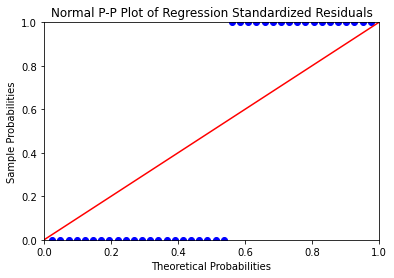

In [16]:
#Residual Analysis
resid = lm.resid
probplot = sm.ProbPlot( resid )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

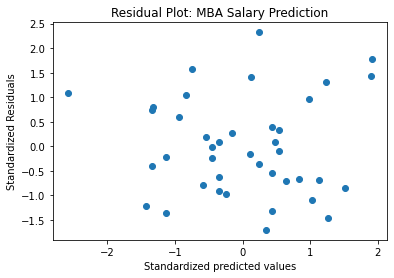

In [17]:
#Homoscedasticity Test
def get_standardized_values( vals ):    
    return (vals - vals.mean())/vals.std()

plt.scatter( get_standardized_values( lm.fittedvalues ), 
            get_standardized_values( resid ) )
plt.title( "Residual Plot: MBA Salary Prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");

In [18]:
#Making Prediction
pred_y = lm.predict( test_X )

In [20]:
np.abs(r2_score(test_y, pred_y))

0.156645849742304

In [21]:
np.sqrt(mean_squared_error(test_y, pred_y))

73458.04348346895

In [26]:
#Calculating Prediction Intervals
# Predict the y values
pred_y = lm.predict( test_X )

# Predict the low and high interval values for y
_, pred_y_low, pred_y_high = wls_prediction_std( lm, test_X, alpha = 0.1)

# Store all the values in a dataframe
pred_y_df = pd.DataFrame( { 'grade_10_perc': test_X['Percentage in Grade 10'],
                            'pred_y': pred_y,
                            'pred_y_left': pred_y_low,
                            'pred_y_right': pred_y_high } )
pred_y_df[0:10]

,grade_10_perc,pred_y,pred_y_left,pred_y_right
6,70.0,279828.402452,158379.832044,401276.972860
36,68.0,272707.227686,151576.715020,393837.740352
37,52.0,215737.829560,92950.942395,338524.716726
28,58.0,237101.353858,115806.869618,358395.838097
43,74.5,295851.045675,173266.083342,418436.008008
49,60.8,247070.998530,126117.560983,368024.436076
5,55.0,226419.591709,104507.444388,348331.739030
33,78.0,308313.101515,184450.060488,432176.142542
20,63.0,254904.290772,134057.999258,375750.582286
42,74.4,295494.986937,172941.528691,418048.445182


# **Multi-Linear Regression**
In this code I have used Linear Regression Model to Predict the Auction Price for IPL Players


In [27]:
#Importing the Dataset
df = pd.read_csv( 'IPL IMB381IPL2013.csv' )
df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [37]:
#Displaying features
df.iloc[0:5, 0:12]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,0,0.0
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,37.6
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,288,32.9
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,36.8
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,0,0.0


In [38]:
df.iloc[0:5, 12:]

,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,0,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,0,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,0,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,0,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [39]:
#Selecting Features Required
X_features = df.columns
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 
              'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

In [42]:
#Encoding Categorical Features
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']
encoded_df = pd.get_dummies( df[X_features], columns = categorical_features, drop_first = True )
encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [45]:
#Defining Dependent and Independent Variables i.e. 'Y' and 'x' resp.
X_features = encoded_df.columns
X = sm.add_constant( encoded_df )
Y = df['SOLD PRICE']

In [46]:
#Now we split the data for training and testing
train_X, test_X, train_y, test_y = train_test_split( X, Y, train_size = 0.8, random_state = 42 )

In [47]:
#Applying OLS Model
model_1 = sm.OLS(train_y, train_X).fit()
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2023-01-17 07:50        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
----------------------------------------------------------------

As we can see above, there is multi-collinearity between independent variables which needs to be corrected and for that we will use **Variance Inflation Factor**.

In [49]:
#VIF
def get_vif_factors( X ):
    X_matrix = X.to_numpy()
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['vif'] = vif
    
    return vif_factors

In [50]:
#Above method will return the VIF for the corresponding coulmns
vif_factors = get_vif_factors( X[X_features] )
vif_factors

,column,vif
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


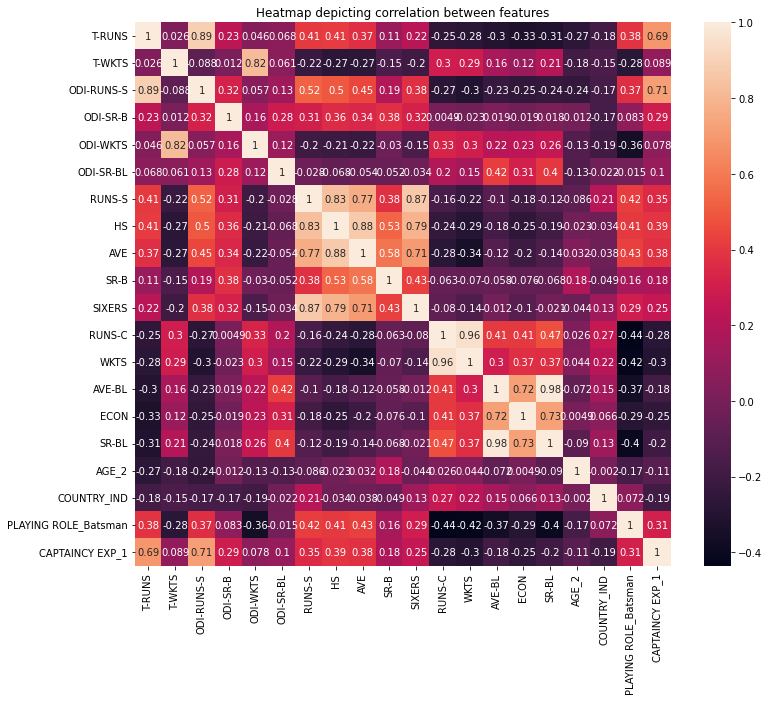

In [51]:
#Checking Correlations with large VIF
columns_with_large_vif = vif_factors[vif_factors.vif > 4].column
plt.figure( figsize = (12,10) )
sn.heatmap( X[columns_with_large_vif].corr(), annot = True );
plt.title( "Heatmap depicting correlation between features");

In [53]:
#We will remove non-required columns
columns_to_be_removed = ['T-RUNS', 'T-WKTS', 'RUNS-S', 'HS', 'AVE', 'RUNS-C', 'SR-B', 'AVE-BL', 
                         'ECON', 'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL']
X_new_features = list( set(X_features) - set(columns_to_be_removed) )
get_vif_factors( X[X_new_features] )

,column,vif
0,COUNTRY_NZ,1.173418
1,COUNTRY_WI,1.194093
2,COUNTRY_SL,1.519752
3,PLAYING ROLE_Batsman,2.680207
4,ODI-WKTS,2.742889
5,AGE_3,1.779861
6,COUNTRY_ZIM,1.205305
7,COUNTRY_ENG,1.131869
8,SIXERS,2.397409
9,WKTS,2.883101


In [54]:
#Applying Model again after removing multi-collinearity
train_X = train_X[X_new_features]

ipl_model_2 = sm.OLS(train_y, train_X).fit()
ipl_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.728     
Dependent Variable:         SOLD PRICE         AIC:                           2965.1080 
Date:                       2023-01-17 07:58   BIC:                           3012.7070 
No. Observations:           104                Log-Likelihood:                -1464.6   
Df Model:                   18                 F-statistic:                   16.49     
Df Residuals:               86                 Prob (F-statistic):            1.13e-20  
R-squared (uncentered):     0.775              Scale:                         1.2071e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
COUNTRY_NZ              142968.8843 151841.7382  0.9416 0.3491 -158882.5009  444820.2695
COUNTRY_WI              -22234.9315 213050.5847 -0.1044 0.9171 -445765.4766  401295.6135
COUNTRY_SL               55912.3398 142277.1829  0.3930 0.6953 -226925.3388  338750.0184
PLAYING ROLE_Batsman    121382.0570 106685.0356  1.1378 0.2584  -90700.7746  333464.8886
ODI-WKTS                   772.4088    470.6354  1.6412 0.1044    -163.1834    1708.0009
AGE_3                    -8950.6659  98041.9325 -0.0913 0.9275 -203851.5772  185950.2453
COUNTRY_ZIM             -67977.6781 390859.9289 -0.1739 0.8623 -844981.5006  709026.1444
COUNTRY_ENG             682934.7166 216150.8279  3.1595 0.0022  253241.0920 1112628.3411
SIXERS                    7862.1259   2086.6101  3.7679 0.0003    3714.0824   12010.1694
WKTS                      2431.8988   2105.3524  1.1551 0.2512   -1753.4033    6617.2008
COUNTRY_IND             282829.8091  96188.0292  2.9404 0.0042   91614.3356  474045.2827
CAPTAINCY EXP_1         208376.6957  98128.0284  2.1235 0.0366   13304.6315  403448.7600
PLAYING ROLE_Bowler     -18315.4968 106035.9664 -0.1727 0.8633 -229108.0215  192477.0279
ODI-SR-BL                  909.0021   1267.4969  0.7172 0.4752   -1610.6983    3428.7026
PLAYING ROLE_W. Keeper  -55121.9240 169922.5271 -0.3244 0.7464 -392916.7280  282672.8801
COUNTRY_PAK             122810.2480 159600.8063  0.7695 0.4437 -194465.6541  440086.1502
COUNTRY_SA              108735.9086 115092.9596  0.9448 0.3474 -120061.3227  337533.1399
COUNTRY_BAN            -108758.6040 369274.1916 -0.2945 0.7691 -842851.4010  625334.1930
----------------------------------------------------------------------------------------
Omnibus:                       8.635               Durbin-Watson:                  2.252
Prob(Omnibus):                 0.013               Jarque-Bera (JB):               8.345
Skew:                          0.623               Prob(JB):                       0.015
Kurtosis:                      3.609               Condition No.:                  1492 
========================================================================================
* The condition number is large (1e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [56]:
significant_vars = ['COUNTRY_IND', 'COUNTRY_ENG', 'SIXERS', 'CAPTAINCY EXP_1']

train_X = train_X[significant_vars]

ipl_model_3 = sm.OLS(train_y, train_X).fit()
ipl_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2023-01-17 08:01 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================

"""

In [59]:
#Residual Analysis
def plot_resid_fitted( fitted, resid, title):
    plt.scatter( get_standardized_values( fitted ), get_standardized_values( resid ) )
    plt.title( title )
    plt.xlabel( "Standardized predicted values")
    plt.ylabel( "Standardized residual values")    
    plt.show()

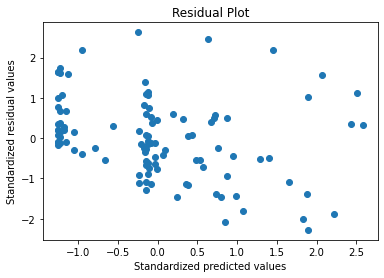

In [60]:
plot_resid_fitted( ipl_model_3.fittedvalues, ipl_model_3.resid, "Residual Plot")

In [62]:
#Transforming Response Variables
train_y = np.sqrt( train_y )

ipl_model_4 = sm.OLS(train_y, train_X).fit()
ipl_model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.741     
Dependent Variable:     SOLD PRICE       AIC:                         1527.9999 
Date:                   2023-01-17 08:04 BIC:                         1538.5775 
No. Observations:       104              Log-Likelihood:              -760.00   
Df Model:               4                F-statistic:                 75.29     
Df Residuals:           100              Prob (F-statistic):          2.63e-29  
R-squared (uncentered): 0.751            Scale:                       1.3550e+05
-----------------------------------------------------------------------------------
                    Coef.      Std.Err.      t       P>|t|      [0.025      0.975] 
-----------------------------------------------------------------------------------
COUNTRY_IND        490.7089     63.9238    7.6765    0.0000    363.8860    617.5318
COUNTRY_ENG        563.0261    217.2801    2.5912    0.0110    131.9486    994.1036
SIXERS               8.5338      1.6995    5.0213    0.0000      5.1620     11.9055
CAPTAINCY EXP_1    417.7575     76.0204    5.4953    0.0000    266.9352    568.5799
--------------------------------------------------------------------------------
Omnibus:                   0.017             Durbin-Watson:                1.879
Prob(Omnibus):             0.992             Jarque-Bera (JB):             0.145
Skew:                      0.005             Prob(JB):                     0.930
Kurtosis:                  2.817             Condition No.:                165  
================================================================================

"""

In [65]:
#Making Prediction
pred_y = np.power( ipl_model_4.predict( test_X[train_X.columns] ), 2)
np.sqrt(metrics.mean_squared_error(pred_y, test_y))

496151.18122558534

In [66]:
np.round( metrics.r2_score(pred_y, test_y), 2 )

0.44